(-8.0, 8.0, -8.0, 8.0)

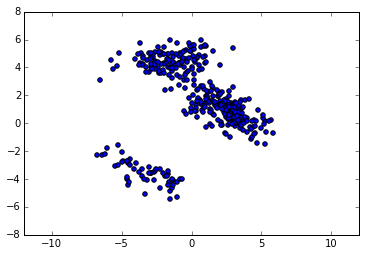

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from sklearn.utils import check_array, check_random_state
from sklearn.datasets.samples_generator import make_spd_matrix
from sklearn import cluster
from sklearn import preprocessing
import warnings
import itertools
from matplotlib import animation
import matplotlib as mpl
warnings.filterwarnings('always')

from sklearn.mixture import GMM as gmm
from sklearn.mixture import GaussianMixture as gm
from sklearn.mixture.bayesianmixture import BayesianGaussianMixture as bgmm
from sklearn.mixture import DirichletProcessGaussianMixture as dpgm

rng = np.random.RandomState(42)
n_samples = 400
n_features = 2
n_components = 3

c = 0
means = [rng.uniform(-1, 1, n_features) * 5 for _ in range(n_components)]
covars = [make_spd_matrix(n_features, rng) for _ in range(n_components)]
weights = rng.rand(n_components)
weights = weights / np.sum(weights)

n_samples_components = np.round(weights * n_samples).astype(int)
X = np.vstack([rng.multivariate_normal(means[j], covars[j], np.round(weights[j] * n_samples).astype(int))
               for j in range(n_components)])
    
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


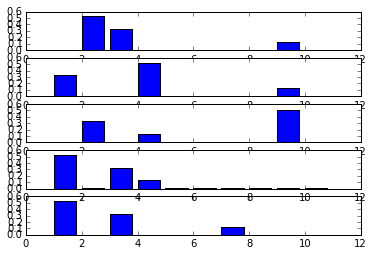

In [16]:
for i, alpha in enumerate([1e-2, 1e-1, 1, 10, 100]):
    bg = dpgm(n_init=1, n_iter=100, tol=1e-4, n_components=10, verbose=11, init_params='random',
             precision_type='full', gamma_prior=alpha)
    bg.fit(X)
    plt.subplot(5, 1, i)
    w = bg._log_snapshot[-1][0]
    w = w / np.sum(w)
    plt.bar(range(1, 11), w)